# Metropolis-Montecarlo para Ising 2D



In [1]:
import copy
import numpy as np
import matplotlib.pyplot as plt

def hamiltonian(state,J):
    '''
    Hamiltonian for the 2D Ising problem with periodic bc's

    Parameters
    ----------

    state : array of ints
        State of each spin in the 2D lattice.
    J : float
        Coupling constant

    Returns
    -------

    The total energy of the system.
    '''
    H   = 0
    N,N = np.shape(state)

    # Loop through all sites in the lattice
    for i in range(N): # 0, 1, ..., N-1
        for j in range(N):
            # Nearest neighbors
            a = (i+1)%N
            b = (j+1)%N
            H = H + state[i,j]*(state[a,j] + state[i,b])
    return -J*H

def reduced(state,i,j,J):
    '''Energy contribution from a single spin'''
    N,N = np.shape(state)
    a = (i+1)%N
    b = (j+1)%N
    c = (i-1)%N
    d = (j-1)%N
    return -J*state[i,j]*(state[a,j]+state[c,j]+state[i,b]+state[i,d])

def montecarlo(beta,N=32,J=1,out_freq=100,num_iters=200000,odir=''):
    '''
    Metropolis Montecarlo method for the 2D Ising problem.

    Parameters
    ---------

    beta : float
        Thermodynamic beta, i.e., 1/kT.
    N : int
        Number of sites in each dimension.
    J : float
        Coupling constant.
    out_freq : int
        Output frequency.
    num_iters : int
        Number of iterations.

    Returns
    -------
    magnetiz : array of floats
        Total magnetization at each step of the Markov process.
    energies : array of floats
        Total energy at each step of the Markov process.
    state : NxN array of ints
        Final state of the system
    state0: NxN array of ints
        Initial state of the system
    '''

    # Random initial configuration
    state  = np.random.choice([-1,1],size=(N,N))
    state0 = copy.copy(state)
    magnetiz = []
    energies = []

    for k in range(num_iters):
        # Write average energy and magnetization
        if k%out_freq == 0:
            energies.append(hamiltonian(state,J))
            magnetiz.append((np.sum(state))/N**2)

        # Random spin to be flipped
        i,j = np.random.randint(N), np.random.randint(N)
        H0  = reduced(state,i,j,J)

        # Flip spin
        state[i,j] = -1*state[i,j]
        H = reduced(state,i,j,J)
        deltaH = H-H0

        if deltaH<=0:
            # If the flip lowers the energy, accept it
            pass
        else:
            # If the flip increases the energy, accept it
            # with probability exp(-beta*deltaH)
            # Otherwise revert back to original state
            prob = np.exp(-beta*deltaH)
            coin = np.random.random()
            if coin<prob:
                pass
            else:
                state[i,j] = -1*state[i,j]

    # Return solution
    return np.array(magnetiz),np.array(energies),state,state0

def montecarlo2(state,beta,N=32,J=1,out_freq=100,num_iters=200000,odir=''):
    '''
    Metropolis Montecarlo method for the 2D Ising problem.

    Parameters
    ---------

    beta : float
        Thermodynamic beta, i.e., 1/kT.
    N : int
        Number of sites in each dimension.
    J : float
        Coupling constant.
    out_freq : int
        Output frequency.
    num_iters : int
        Number of iterations.

    Returns
    -------
    magnetiz : array of floats
        Total magnetization at each step of the Markov process.
    energies : array of floats
        Total energy at each step of the Markov process.
    state : NxN array of ints
        Final state of the system
    state0: NxN array of ints
        Initial state of the system
    '''

    # Random initial configuration
    state0 = copy.copy(state)
    magnetiz = []
    energies = []

    for k in range(num_iters):
        # Write average energy and magnetization
        if k%out_freq == 0:
            energies.append(hamiltonian(state,J))
            magnetiz.append((np.sum(state))/N**2)

        # Random spin to be flipped
        i,j = np.random.randint(N), np.random.randint(N)
        H0  = reduced(state,i,j,J)

        # Flip spin
        state[i,j] = -1*state[i,j]
        H = reduced(state,i,j,J)
        deltaH = H-H0

        if deltaH<=0:
            # If the flip lowers the energy, accept it
            pass
        else:
            # If the flip increases the energy, accept it
            # with probability exp(-beta*deltaH)
            # Otherwise revert back to original state
            prob = np.exp(-beta*deltaH)
            coin = np.random.random()
            if coin<prob:
                pass
            else:
                state[i,j] = -1*state[i,j]

    # Return solution
    return np.array(magnetiz),np.array(energies),state,state0

# Preequilibrio y tiempos de relajación

Elegir configuraciones iniciales al azar pone al sistema en un punto del espacio de fases que generalmente tiene poco que ver con configuraciones típicas exploradas por el sistema en equilibrio para valores dados de T . Analice, a partir de la evolución de los observables del item (1.a) el número de pasos de Markov necesarios para considerar al sitema “termalizado”. Realice esta estimación para diferentes temperaturas, en particular para temperaturas mayores, menores y cercanas a la $T_c$. Este análisis le debe servir para estimar el número de configuraciones iniciales que debe ser descartado para el calculo de valores medios en equilibrio. ¿Con que configuración nos conviene arrancar a cada $T$?


Text(0, 0.5, 'Magnetización total media')

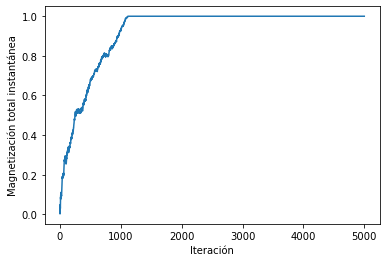

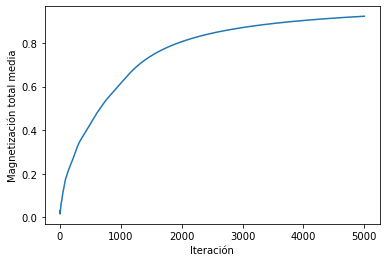

In [2]:
N = 32
num_iters = 500000
beta      = 1000.0
out_freq  = 100
magnetiz, energies, state, state0 = montecarlo(beta,
                                               N=N,
                                               J=1,
                                               num_iters=num_iters,
                                               out_freq=out_freq)

steps = np.arange(num_iters//out_freq)
plt.figure(1)
plt.plot(steps, magnetiz)
plt.xlabel('Iteración')
plt.ylabel('Magnetización total instantánea')
plt.figure(2)
plt.plot(steps, [np.mean(magnetiz[:tt+1]) for tt in steps])
plt.xlabel('Iteración')
plt.ylabel('Magnetización total media')

Text(0, 0.5, 'Magnetización total media')

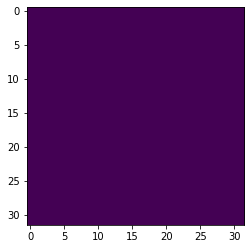

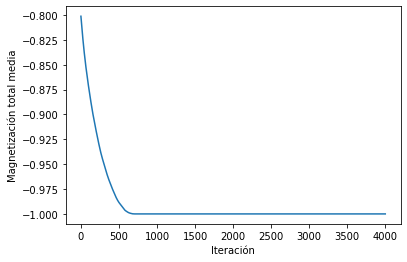

In [ ]:
plt.imshow(state)
plt.figure(2)
plt.plot([np.mean(magnetiz[tt:tt+1000]) for tt in range(len(steps)-1000)])
plt.xlabel('Iteración')
plt.ylabel('Magnetización total media')

# Magnetización y energía media en función de la temperatura



1. Estime, como función de la temperatura $\langle |m(T, H = 0)|\rangle$ y $\langle e(T, H = 0)\rangle$. Para ello utilice una red de spines cuadrada de lado $L = 32$, y realice un barrido entre $T = 0$ y $T = 4$. Para la región de $T \sim T_c$ aumente la resolución del sampleo. Re-utilice la última configuración de una temperatura para la siguiente. Compare lo obtenido con el resultado que se obtiene bajo la aproximación de campo medio. Discuta sobre el origen de las posibles diferencias.
2. De manera similar, analice el comportamiento de las fluctuaciones de $e$ y $m$ en función de la temperatura . ¿Con qué cantidades físicas conocidas se relacionan dichas fluctuaciones? Fluctaciones: $\sigma^2(x) = \langle x^2 \rangle - \langle x\rangle^2$
3. Estime $T_c$.



In [3]:
from scipy.constants import k
N = 32
num_iters = 500000
Ts = range(1,6)
K = k

### (1)
Aca graficamos la magnetizacion media para distintas temperaturas

Text(0, 0.5, 'Magnetización total media')

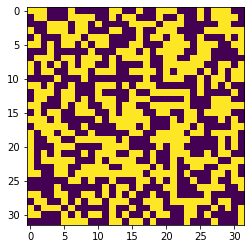

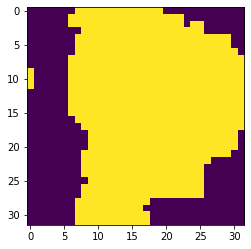

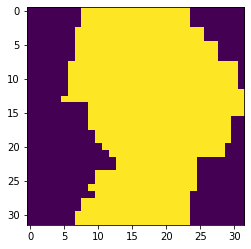

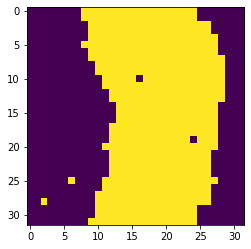

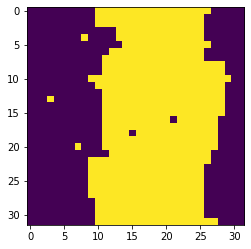

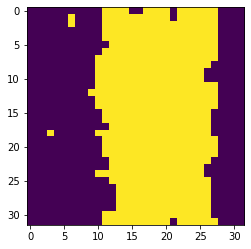

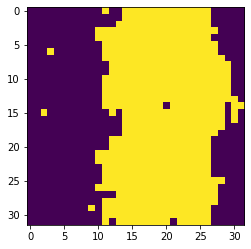

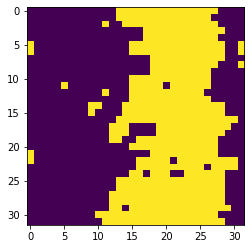

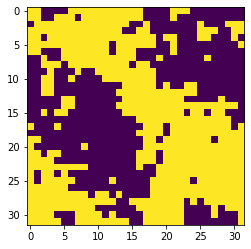

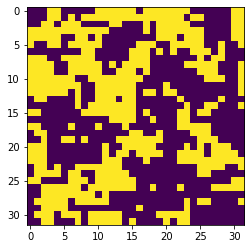

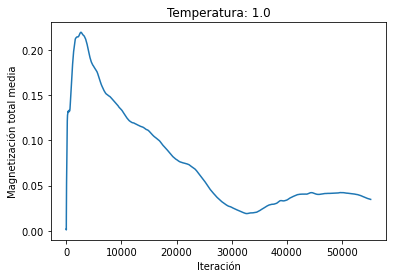

In [10]:
state  = np.random.choice([-1,1],size=(N,N))
num_iters = 50000
beta= np.linspace(1,.25,10)
magnetizacion = []
for i,b in enumerate(beta):
    out_freq  = round(50/(i+1))
    steps = np.arange(num_iters//out_freq)
    magnetiz, energies, state, state0 = montecarlo2(state,b,
                                               N=N,
                                               J=1,
                                               num_iters=num_iters,
                                               out_freq=out_freq)
    magnetizacion = magnetizacion + list(magnetiz)
    plt.figure()
    plt.imshow(state0)
plt.figure()
plt.title(f'Temperatura: {T}')
plt.plot([np.mean(magnetizacion[:tt]) for tt in range(len(magnetizacion))])
plt.xlabel('Iteración')
plt.ylabel('Magnetización total media')
    

Aca juntamos todo en un grafico (para poder visualizar mejor alrededor de que temperatura esta la critica)

Text(0, 0.5, 'Magnetización total media')

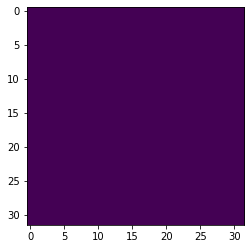

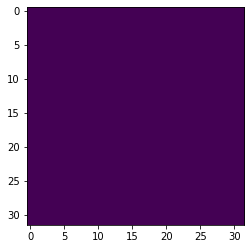

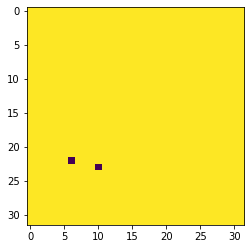

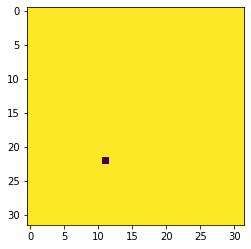

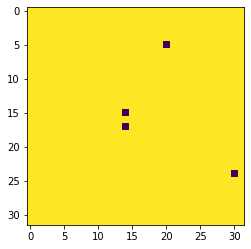

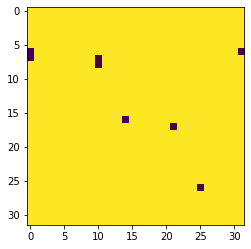

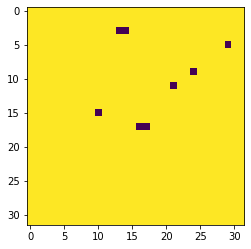

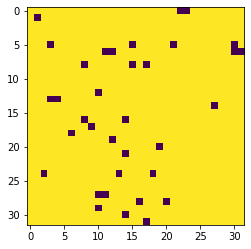

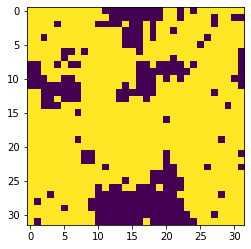

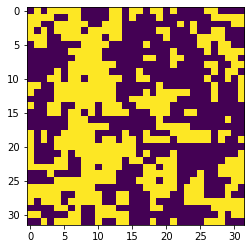

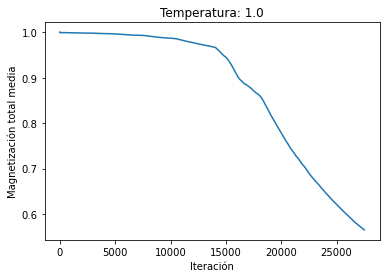

In [18]:
state  = np.random.choice([1,1],size=(N,N))
num_iters = 500000
beta= np.linspace(1,.25,10)
magnetizacion = []
for i,b in enumerate(beta):
    out_freq  = round(1000/(i+1))
    steps = np.arange(num_iters//out_freq)
    magnetiz, energies, state, state0 = montecarlo2(state,b,
                                               N=N,
                                               J=1,
                                               num_iters=num_iters,
                                               out_freq=out_freq)
    magnetizacion = magnetizacion + list(magnetiz)
    plt.figure()
    plt.imshow(state0)
plt.figure()
plt.title(f'Temperatura: {T}')
plt.plot([np.mean(magnetizacion[:tt]) for tt in range(len(magnetizacion))])
plt.xlabel('Iteración')
plt.ylabel('Magnetización total media')
    

In [35]:
%matplotlib qt
plt.figure()
plt.plot(magnetizacion)
plt.plot([np.mean(magnetizacion[:tt]) for tt in range(len(magnetizacion))])

C:\Users\Luna\anaconda3.2\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Luna\anaconda3.2\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


### (2) 
Fluctuaciones $\sigma^2(x) = \langle x^2 \rangle - \langle x\rangle^2$

In [34]:
fluc_total = np.std(magnetizacion)**2
flucs = [np.std(magnetizacion[round(n):round(n + 50000/10)]) for n in np.linspace(0,50000,10)]
                
plt.figure()
plt.plot(flucs)

In [ ]:
np.linspace(0,500000,10)

In [13]:
state  = np.random.choice([1,1],size=(N,N))
state

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

# Exponentes críticos

Con el valor de $T_c$, encuentre el exponente crítico $\alpha $ tal que $m \sim (T-T_c)^\alpha $. compare con los resultados exactos y de campos medio. Repita el análisis para el exponente de la susceptibilidad magnética (para calcular la susceptibilidad vea el item 2 del inciso anterior).

# Correlaciones

La **función de correlación** se define como $g(r)=\langle s_{ij}s_{ij+r}\rangle-\langle s_{ij}\rangle\langle s_{ij+r}\rangle$, y se sabe que tiene la forma $g(r)=ae^{-r/\xi}$. A $\xi$ se lo conoce como la **longitud de correlación**, y es una función de la temperatura que, en el límite termodinámico, diverge a la temperatura crítica. Calcule la longitud de correlación en functión de la temperatura.

# Opcional: Efectos de tamaño finito

Discuta los efectos del tamaño finito del sistema en la estimación de observables definidos en el límite termodinámico. Encuentre estimaciones de $T_c$ para redes de diferente tamaño ($L=8, 16, 32, 64, 128, 256$). ¿Qué tendencia observa? ¿Es posible extrapolar lo encontrado para $L\rightarrow \infty$?
